<a href="https://colab.research.google.com/github/nggra/Project_UAS_Bengkod/blob/main/PROJECT2_UAS_BENGKOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import joblib
import warnings
warnings.filterwarnings('ignore')



In [ ]:
file_path = '/content/ObesityDataSet.csv'
df = pd.read_csv(file_path)

In [ ]:
head = df.head()
info = df.info()
description = df.describe(include='all')

head, description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

(  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
 0  21  Female   1.62     64          no   no    2   3   no    no    2   
 1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
 2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
 3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
 4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   
 
   family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
 0                            yes   0   1  Sometimes  Public_Transportation   
 1                            yes   3   0  Sometimes  Public_Transportation   
 2                            yes   2   1  Sometimes  Public_Transportation   
 3                             no   2   0  Sometimes                Walking   
 4                             no   0   0  Sometimes  Public_Transportation   
 
             NObeyesdad  
 0        Normal_Weight  
 1        Normal_Weight  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [ ]:
# Konversi kolom numerik ke float
numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # ubah ke float, NaN jika gagal

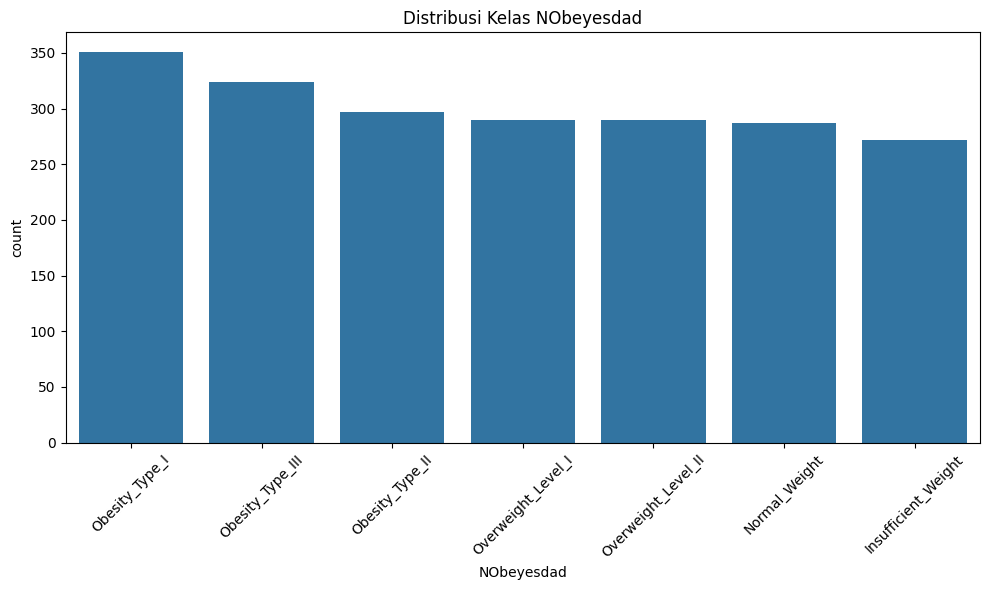

In [ ]:
# Visualisasi distribusi label
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kelas NObeyesdad')
plt.tight_layout()
plt.show()

In [ ]:
# Cek missing values
missing_values = df.isnull().sum()
print(df.isnull().sum())

Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [ ]:
# Cek data duplikat
duplicates = df.duplicated().sum()
print(df.duplicated().sum())

18


In [ ]:
# Cek nilai unik tiap kolom
unique_values = df.nunique()
print(df.nunique())

Age                               1393
Gender                               3
Height                            1561
Weight                            1517
CALC                                 5
FAVC                                 3
FCVC                               807
NCP                                636
SCC                                  3
SMOKE                                3
CH2O                              1262
family_history_with_overweight       3
FAF                               1185
TUE                               1129
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


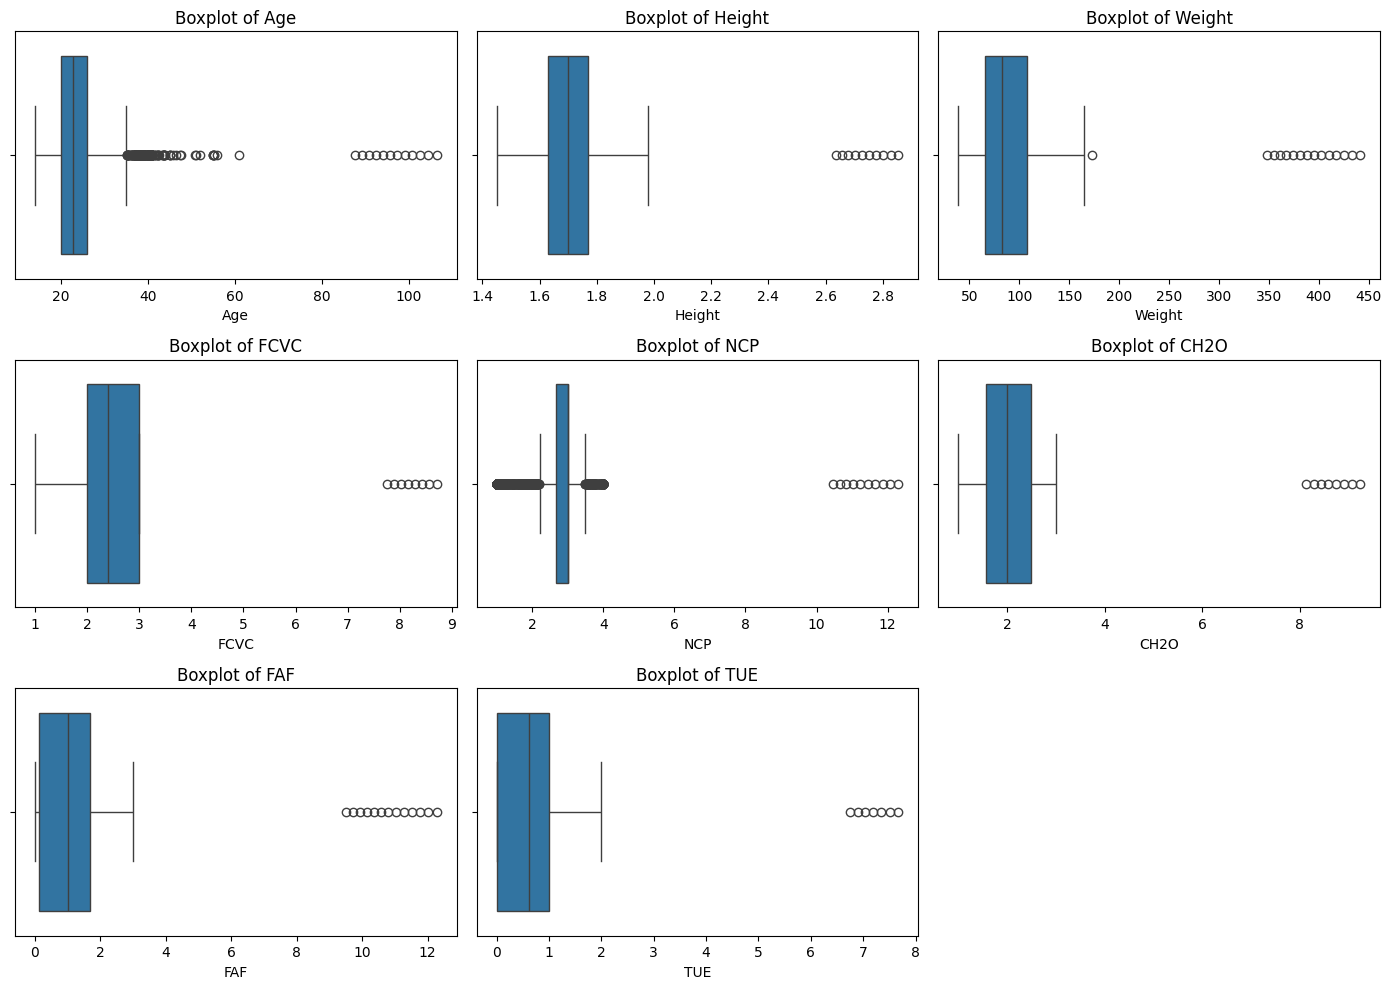

(Age                               22
 Gender                             9
 Height                            22
 Weight                            19
 CALC                               5
 FAVC                              11
 FCVC                              18
 NCP                               22
 SCC                               10
 SMOKE                              5
 CH2O                              15
 family_history_with_overweight    13
 FAF                               19
 TUE                               15
 CAEC                              11
 MTRANS                             6
 NObeyesdad                         0
 dtype: int64,
 np.int64(18),
 Age                               1393
 Gender                               3
 Height                            1561
 Weight                            1517
 CALC                                 5
 FAVC                                 3
 FCVC                               807
 NCP                                636
 SCC

In [ ]:
# Boxplot untuk mendeteksi outlier pada kolom numerik
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

missing_values, duplicates, unique_values

In [ ]:
# Salin data asli
df_clean = df.copy()

In [ ]:
# Hapus data duplikat
df_clean = df_clean.drop_duplicates()

In [ ]:
# Kategorikal: imputasi dengan modus
cat_columns = df_clean.select_dtypes(include='object').columns.drop('NObeyesdad')
cat_imputer = SimpleImputer(strategy='most_frequent')
df_clean[cat_columns] = cat_imputer.fit_transform(df_clean[cat_columns])

In [ ]:
print("Menghapus outlier menggunakan metode IQR...")

outlier_counts = {}

for col in numeric_columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    before_rows = df_clean.shape[0]
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    after_rows = df_clean.shape[0]
    outlier_counts[col] = before_rows - after_rows

Menghapus outlier menggunakan metode IQR...


In [ ]:
# Tampilkan hasil penghapusan per kolom
for col, count in outlier_counts.items():
    print(f"- {col}: {count} baris dihapus")

- Age: 201 baris dihapus
- Height: 31 baris dihapus
- Weight: 31 baris dihapus
- FCVC: 22 baris dihapus
- NCP: 528 baris dihapus
- CH2O: 13 baris dihapus
- FAF: 23 baris dihapus
- TUE: 14 baris dihapus


In [ ]:
# Encoding kategorikal
encoder = LabelEncoder()
for col in cat_columns:
    df_clean[col] = encoder.fit_transform(df_clean[col])

In [ ]:
# Encode target
df_clean['NObeyesdad'] = encoder.fit_transform(df_clean['NObeyesdad'])

In [ ]:
# Normalisasi/standarisasi data numerik
scaler = StandardScaler()
df_clean[numeric_columns] = scaler.fit_transform(df_clean[numeric_columns])

In [ ]:
# Cek ulang info dataset setelah preprocessing
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1230 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1230 non-null   float64
 1   Gender                          1230 non-null   int64  
 2   Height                          1230 non-null   float64
 3   Weight                          1230 non-null   float64
 4   CALC                            1230 non-null   int64  
 5   FAVC                            1230 non-null   int64  
 6   FCVC                            1230 non-null   float64
 7   NCP                             1230 non-null   float64
 8   SCC                             1230 non-null   int64  
 9   SMOKE                           1230 non-null   int64  
 10  CH2O                            1230 non-null   float64
 11  family_history_with_overweight  1230 non-null   int64  
 12  FAF                             1230 no

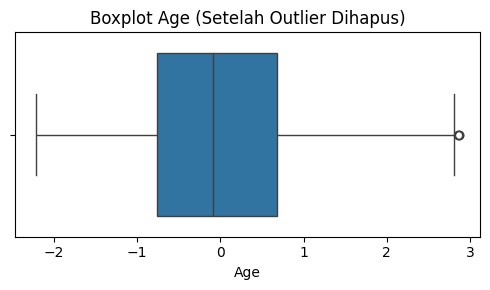

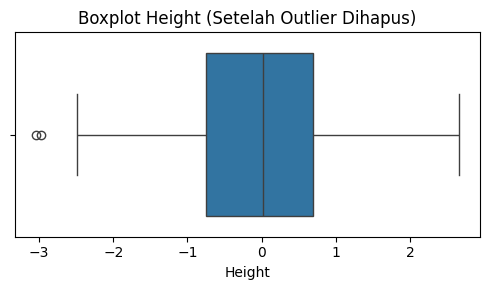

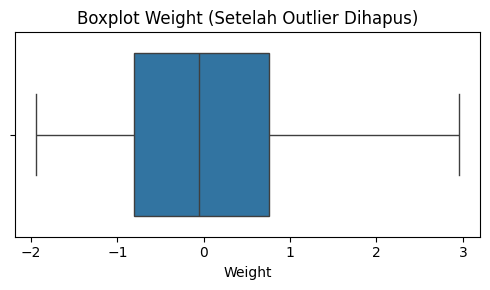

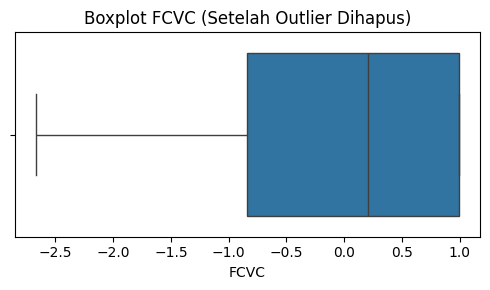

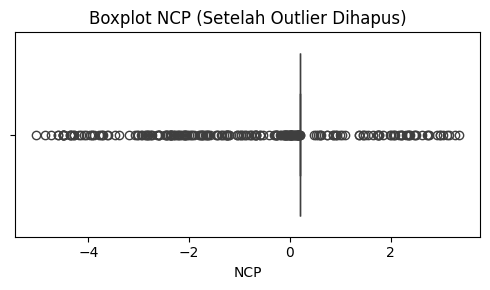

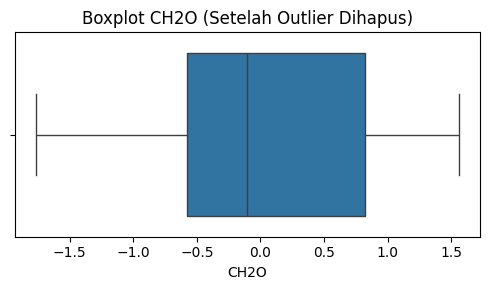

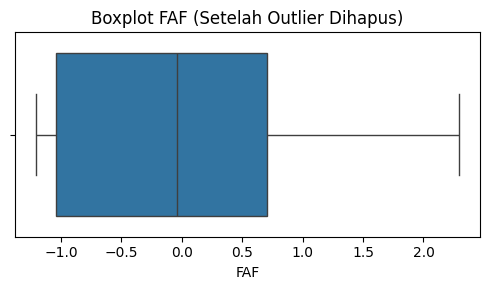

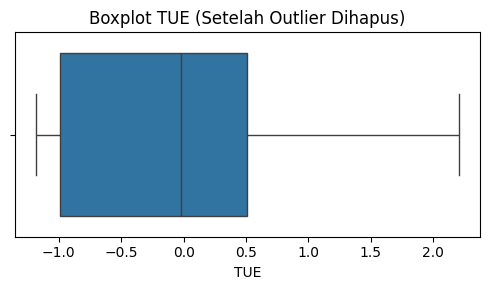

In [ ]:
for col in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot {col} (Setelah Outlier Dihapus)')
    plt.tight_layout()
    plt.show()

In [ ]:
# Kesimpulan keseluruhan tahap EDA
print("\nKESIMPULAN EDA:")
print("- Dataset awal terdiri dari 2111 baris dan 17 kolom.")
print("- Sebanyak 4 baris duplikat ditemukan dan berhasil dihapus.")
print("- Tidak ditemukan missing values dalam dataset.")
print("- Terdapat ketidakseimbangan pada kelas target 'NObeyesdad', sehingga perlu penanganan (misalnya dengan oversampling atau undersampling.")
print("- Proses deteksi outlier dilakukan pada fitur numerik menggunakan metode IQR (Interquartile Range).")


KESIMPULAN EDA:
- Dataset awal terdiri dari 2111 baris dan 17 kolom.
- Sebanyak 4 baris duplikat ditemukan dan berhasil dihapus.
- Tidak ditemukan missing values dalam dataset.
- Terdapat ketidakseimbangan pada kelas target 'NObeyesdad', sehingga perlu penanganan (misalnya dengan oversampling atau undersampling.
- Proses deteksi outlier dilakukan pada fitur numerik menggunakan metode IQR (Interquartile Range).
